## Multi-year UNSEEN ##

Test notebook for figuring out the methodology for exploring how to create a synthetic event set for multi-year wind droughts.

In [1]:
# Import local modules
import sys
import os
import glob

# Import third-party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import iris
from xarray import DataArray

ERROR 1: PROJ: proj_create_from_database: Open of /apps/jasmin/jaspy/mambaforge_envs/jaspy3.10/mf-22.11.1-4/envs/jaspy3.10-mf-22.11.1-4-r20230718/share/proj failed


In [2]:
# Import my modules
import dictionaries as dic

from functions import load_model_data

### Exploring gridboxes ###

Checking that the gridboxes are where we expect them to be

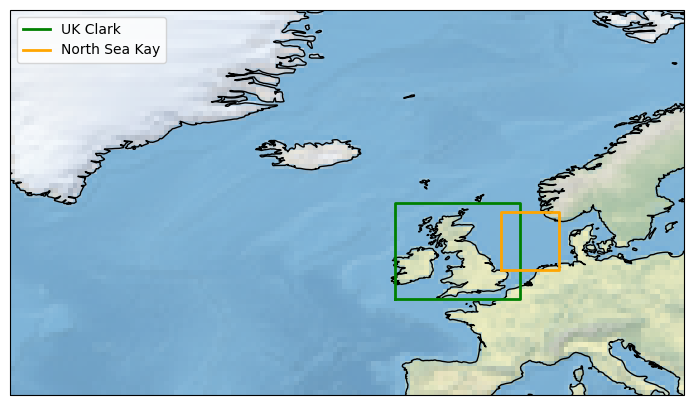

In [3]:
# First, we want to visualise th gridboxes which we might want to use
# The UK grid box or the north sea grid box

# Set up the projection
projection = ccrs.PlateCarree(central_longitude=0)

# Plot the differences between the two gridboxes
# Set up the figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# # Include the stock image and coastlines
ax.stock_img()
ax.coastlines()

# Extract the lat and lon data for the UK box
lon1_uk, lon2_uk = dic.uk_grid['lon1'], dic.uk_grid['lon2']
lat1_uk, lat2_uk = dic.uk_grid['lat1'], dic.uk_grid['lat2']

# Extract the lat and lon data for the North Sea box
lon1_ns, lon2_ns = dic.north_sea_kay['lon1'], dic.north_sea_kay['lon2']
lat1_ns, lat2_ns = dic.north_sea_kay['lat1'], dic.north_sea_kay['lat2']

# Plot these boxes
ax.plot([lon1_uk, lon2_uk, lon2_uk, lon1_uk, lon1_uk],
        [lat1_uk, lat1_uk, lat2_uk, lat2_uk, lat1_uk],
        color='green', linewidth=2, transform=projection, label="UK Clark")

# Plot these boxes
ax.plot([lon1_ns, lon2_ns, lon2_ns, lon1_ns, lon1_ns],
        [lat1_ns, lat1_ns, lat2_ns, lat2_ns, lat1_ns],
        color='orange', linewidth=2, transform=projection, label="North Sea Kay")

# Zoom in on the region
ax.set_extent([-50, 20, 40, 80], crs=projection)

# Create a legend
ax.legend(loc = 'upper left')

# show the plot
plt.show()

### Choosing time windows ###

We need to define the time period over which we are looking for wind droughts. Here are three we might consider:

* 1 year (12 months Dec-Nov)
* 3 years (36 months Dec-Nov)
* 5 years (60 months Dec-Nov)

In this first example of 1 year, for 1960 there will be 11 total 12 month time series (DJFMAMJJASON):

* 1 will be the truth (from ERA5) - the weather which actually occurred.
* 10 will be from the decadal prediction system (in this case DePreSys with 10 ensemble members).
    * Here we are assuming November initialisation.

### Extracting the data ###

Model data in this example from HadGEM3-GC31-MM.

Obs data in this example from ERA5.

In [4]:
# Set up the parameters for extraction
model_var = "sfcWind"
obs_var = "si10"
test_model = "BCC-CSM2-MR"
experiment = "dcppA-hindcast"

In [5]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import *

In [6]:
# Test the new function
model_data = load_model_data_xarray(model_variable=model_var,
                                    model=test_model,
                                    experiment=experiment,
                                    start_year=1961,
                                    end_year=2014,
                                    grid=dic.uk_grid,
                                    first_fcst_year=1961,
                                    last_fcst_year=1963,
                                    start_month=12,
                                    end_month=3,
                                    )

The model path root is gws
Number of unique variant labels: 8
For model: BCC-CSM2-MR
Unique variant labels: ['r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1' 'r4i1p1f1' 'r5i1p1f1' 'r6i1p1f1'
 'r7i1p1f1' 'r8i1p1f1']
Forming the list of files for each ensemble member for gws


Processing members:  38%|███▊      | 3/8 [01:08<01:54, 22.94s/it]


KeyboardInterrupt: 

In [ ]:
# Look at the data
model_data

In [ ]:
# Print the values
print(model_data.SfcWind.values)

In [ ]:
# test the read_data function
model_data = load_model_data(model_variable=model_var,
                            model=test_model,
                            experiment=experiment,
                            start_year=1961,
                            end_year=2014,
                            avg_period=2,
                            grid=dic.uk_grid)

In [ ]:
print(model_data.shape)

In [ ]:
# Take the mean of the model data over the months axis
model_data_year = model_data.mean(axis=2)

# # Print the new shape
print(model_data_year.shape)

# Winter 1 data
winter1_data = model_data[:, :, 0:4].mean(axis=2)

# summer data
summer_data = model_data[:, :, 4:10].mean(axis=2)

# winter 2 data
winter2_data = model_data[:, :, 10:].mean(axis=2)

# Print the shapes of the new data
print(winter1_data.shape)

# Print the shapes of the new data
print(summer_data.shape)

# Print the shapes of the new data
print(winter2_data.shape)

In [ ]:
# Get the data including the months, no mean
winter1_data_months = model_data[:, :, 0:4]
summer_data_months = model_data[:, :, 4:10]
winter2_data_months = model_data[:, :, 10:]
year_data_months = model_data

In [ ]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import load_model_data, model_stats_bs

In [ ]:
# test the bootstrapping function
stats_dict_year = model_stats_bs(model=year_data_months.mean(axis=2),
                            nboot=10000)

In [ ]:
# test the bootstrapping function
stats_dict_winter1 = model_stats_bs(model=winter1_data_months.mean(axis=2),
                            nboot=10000)

In [ ]:
# test the bootstrapping function
stats_dict_summer = model_stats_bs(model=summer_data_months.mean(axis=2),
                            nboot=10000)

In [ ]:
# test the bootstrapping function
stats_dict_winter2 = model_stats_bs(model=winter2_data_months.mean(axis=2),
                            nboot=10000)

In [ ]:
# print(stats_dict)

In [ ]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import load_model_data, load_obs_data, calculate_obs_stats

In [ ]:
obs_data = load_obs_data(obs_variable=obs_var,
                         regrid_obs_path="/home/users/benhutch/ERA5/surface_wind_ERA5_regrid_HadGEM.nc",
                        start_year=1961,
                        end_year=2014,
                        avg_period=2,
                        grid=dic.uk_grid)

In [ ]:
# Extract and print the obs years
obs_years = obs_data[1]

# print the shape of the obs data
print(obs_years.shape)
print(obs_years)

In [ ]:
# Extract the obs data for the different seasons
obs_data_year = obs_data[0]
obs_data_winter1 = obs_data[0][:, 0:4]
obs_data_summer = obs_data[0][:, 4:10]
obs_data_winter2 = obs_data[0][:, 10:]

In [ ]:
# Calculate the stats
obs_stats_year = calculate_obs_stats(obs_data=obs_data_year,
                                start_year=1960,
                                end_year=2018,
                                avg_period=1,
                                grid=dic.uk_grid)

obs_stats_winter1 = calculate_obs_stats(obs_data=obs_data_winter1,
                                start_year=1960,
                                end_year=2018,
                                avg_period=1,
                                grid=dic.uk_grid)

obs_stats_summer = calculate_obs_stats(obs_data=obs_data_summer,
                                start_year=1960,
                                end_year=2018,
                                avg_period=1,
                                grid=dic.uk_grid)

obs_stats_winter2 = calculate_obs_stats(obs_data=obs_data_winter2,
                                start_year=1960,
                                end_year=2018,
                                avg_period=1,
                                grid=dic.uk_grid)

In [ ]:
print(obs_stats_year)

In [ ]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import load_model_data, load_obs_data, calculate_obs_stats, \
    plot_moments 

In [ ]:
# # Plot the moments of the distribution
# plot_moments(model_stats=stats_dict,
#              obs_stats=obs_stats,)

In [ ]:
# Plot the moments of the distribution for the different seasons
plot_moments(model_stats=stats_dict_year,
             obs_stats=obs_stats_year)

In [ ]:
# Plot the moments of the distribution for the different seasons
plot_moments(model_stats=stats_dict_winter1,
             obs_stats=obs_stats_winter1)

In [ ]:
# Plot the moments of the distribution for the summer
plot_moments(model_stats=stats_dict_summer,
             obs_stats=obs_stats_summer)

In [ ]:
# Plot the moments of the distribution for winter2
plot_moments(model_stats=stats_dict_winter2,
             obs_stats=obs_stats_winter2)

In [ ]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import load_model_data, load_obs_data, calculate_obs_stats, \
    plot_moments, plot_distribution

In [ ]:
plot_distribution(model_data=model_data_year,
                  obs_data=obs_data_year,)

In [ ]:
# Plot the distribution of the winter 1 data
plot_distribution(model_data=winter1_data,
                  obs_data=obs_data_winter1,)

In [ ]:
# Plot the distribution of the summer data
plot_distribution(model_data=summer_data,
                  obs_data=obs_data_summer,)

In [ ]:
# PLot the distribution of the winter 2 data
plot_distribution(model_data=winter2_data,
                  obs_data=obs_data_winter2,)

In [ ]:
# # Take the average over the time period
# # i.e. the 2th axis
# model_data_ann_mean = model_data.mean(axis=2)

# print(model_data_ann_mean)

# print(model_data_ann_mean.shape)

In [ ]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import *

In [ ]:
# Plot the year events
plot_events(model_data=model_data_year,
            obs_data=obs_data_year,
            obs_stats=obs_stats_year,
            start_year=1960,
            end_year=2018,
            figsize_y=5,)

In [ ]:
# Plot the winter 1 events
plot_events(model_data=winter1_data,
            obs_data=obs_data_winter1,
            obs_stats=obs_stats_winter1,
            start_year=1960,
            end_year=2018,
            figsize_y=5,)

In [ ]:
# Plot the summer events
plot_events(model_data=summer_data,
            obs_data=obs_data_summer,
            obs_stats=obs_stats_summer,
            start_year=1960,
            end_year=2018,
            figsize_y=5,)

In [ ]:
# Plot the winter2 events
plot_events(model_data=winter2_data,
            obs_data=obs_data_winter2,
            obs_stats=obs_stats_winter2,
            start_year=1960,
            end_year=2018,
            figsize_y=5,)

In [ ]:
# Calculate the bias
# the difference in the means between the model and the observations
bias = np.mean(model_data_ann_mean.flatten()) - obs_stats['mean']

print(bias)

# Remove the bias from the model data
model_data_ann_mean_bias = model_data_ann_mean - bias

In [ ]:
# create an array of years
years = np.arange(1960, 2019)

# Set up a figure
fig = plt.figure(figsize=(10, 5))

print("Plotting model data shape: ", model_data_ann_mean_bias.shape)

# Plot the data
# Plot the data
for i in range(min(model_data_ann_mean_bias.shape[1], model_data_ann_mean_bias.shape[0] - 1)):
    print("Plotting model data for ensemble member: ", i)
    
    # Separate data into two groups based on the condition
    below_20th = model_data_ann_mean_bias[:, i] < obs_stats['min_20']
    above_20th = ~below_20th
    
    # Plot points below the 20th percentile with a label
    plt.scatter(years[below_20th], model_data_ann_mean_bias[below_20th, i],
                color='blue', alpha=0.8, label='model wind drought' if i == 0 else None)
    
    # Plot points above the 20th percentile without a label
    plt.scatter(years[above_20th], model_data_ann_mean_bias[above_20th, i],
                color='grey', alpha=0.8, label='HadGEM3-GC31-MM' if i == 0 else None)

# plot the obs
plt.scatter(years, obs_data.mean(axis=1), label='ERA5', color='black')

# Plot the 20th percentile
# as a horizontal line
plt.axhline(y=obs_stats['min_20'],
            color='black', linestyle='-')

# Plot the min
# as a horizontal line
plt.axhline(y=obs_stats['min'],
            color='black', linestyle='--')

# Add a legend
plt.legend(loc='upper left')

# Add axis labels
plt.xlabel("Year")

# Add a title
plt.title("Annual mean " + model_var)

# Show the plot
plt.show()

In [ ]:
import seaborn as sns

# Assemble the data into a continuous array
model_data_ann_mean_flat = model_data_ann_mean.flatten()

# Plot the distribution of the data
sns.distplot(model_data_ann_mean_flat, label="model")

# # Plot the mean as a vertical line
# plt.axvline(x=model_data_ann_mean_flat.mean(),
#             color='black', linestyle='-')

# Plot the distribution of the observations
sns.distplot(obs_data.mean(axis=1), label="obs")

# # Plot the mean as a vertical line
# plt.axvline(x=obs_stats['mean'],
#             color='black', linestyle='--')

# Include a textbox with the sample size
plt.text(0.05, 0.85,f"model_n = {model_data_ann_mean_flat.shape[0]}\nobs_n = {obs_data.shape[0]}",
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Add a legend
plt.legend()

# Add a title
plt.title("Annual mean " + model_var + " distribution")

In [ ]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import load_model_data, load_obs_data, calculate_obs_stats, plot_events

In [ ]:
# load model data but for 3 year averages
model_data_3yr_mean = load_model_data(model_variable=model_var,
                            model=test_model,
                            experiment=experiment,
                            start_year=1960,
                            end_year=2018,
                            avg_period=3,
                            grid=dic.uk_grid)

In [ ]:
# Load the observations
obs_data_3yr_mean = load_obs_data(obs_variable=obs_var,
                         regrid_obs_path="/home/users/benhutch/ERA5/surface_wind_ERA5_regrid_HadGEM.nc",
                        start_year=1960,
                        end_year=2018,
                        avg_period=3,
                        grid=dic.uk_grid)

In [ ]:
# Calculate the stats
obs_stats_3yr_mean = calculate_obs_stats(obs_data=obs_data_3yr_mean[0],
                                start_year=1960,
                                end_year=2018,
                                avg_period=3,
                                grid=dic.uk_grid)

In [ ]:
# Calculate the stats dict for the model data
stats_dict_3yr_mean = model_stats_bs(model=model_data_3yr_mean.mean(axis=2),
                            nboot=10000)

In [ ]:
# plot the moments of the distribution
plot_moments(model_stats=stats_dict_3yr_mean,
             obs_stats=obs_stats_3yr_mean,)

In [ ]:
# Plot the distribution of the data
plot_distribution(model_data=model_data_3yr_mean.mean(axis=2),
                  obs_data=obs_data_3yr_mean[0],)

In [ ]:
import importlib

importlib.reload(sys.modules['functions'])

from functions import load_model_data, load_obs_data, calculate_obs_stats, plot_events

In [ ]:
plot_events(model_data=model_data_3yr_mean,
            obs_data=obs_data_3yr_mean,
            obs_stats=obs_stats_3yr_mean,
            start_year=1960,
            end_year=2018,
            figsize_y=5)

In [ ]:
# load model data but for 5 year averages
model_data_5yr_mean = load_model_data(model_variable=model_var,
                            model=test_model,
                            experiment=experiment,
                            start_year=1960,
                            end_year=2018,
                            avg_period=5,
                            grid=dic.uk_grid)

In [ ]:
obs_data_5yr_mean = load_obs_data(obs_variable=obs_var,
                            regrid_obs_path="/home/users/benhutch/ERA5/surface_wind_ERA5_regrid_HadGEM.nc",
                            start_year=1960,
                            end_year=2018,
                            avg_period=5,
                            grid=dic.uk_grid)

In [ ]:
# Calculate the stats
obs_stats_5yr_mean = calculate_obs_stats(obs_data=obs_data_5yr_mean[0],
                                start_year=1960,
                                end_year=2018,
                                avg_period=5,
                                grid=dic.uk_grid)

In [ ]:
# Calculate the model stats bs
stats_dict_5yr_mean = model_stats_bs(model=model_data_5yr_mean.mean(axis=2),
                            nboot=10000)

In [ ]:
# Plot the moments of the distribution
plot_moments(model_stats=stats_dict_5yr_mean,
             obs_stats=obs_stats_5yr_mean,)

In [ ]:
# Plot the distribution of the data
plot_distribution(model_data=model_data_5yr_mean.mean(axis=2),
                  obs_data=obs_data_5yr_mean[0],)

In [ ]:
# Plot the events
plot_events(model_data=model_data_5yr_mean,
            obs_data=obs_data_5yr_mean,
            obs_stats=obs_stats_5yr_mean,
            start_year=1960,
            end_year=2018,
            figsize_y=5)

In [ ]:
# Load the observations data as an iris cube for the si10 variable
# Deal with the expver variables
obs = xr.open_mfdataset(dic.obs_path, combine='by_coords', parallel=True)[obs_var]

# Combine the two expver variables
obs = obs.sel(expver=1).combine_first(obs.sel(expver=5))

# Convert to an iris cube
obs = obs.to_iris()

print(obs)

In [ ]:
# Finding paths for the model variables
# Set up a dataframe with 4 columns
# one for the variable, one for the experiment, one for the model and one for the path
df = pd.DataFrame(columns=['variable', 'experiment', 'model', 'path'])

# # Print the dataframe
# print(df)

# Populate the dataframe
# For variable 'sfcwind', set the 'experiment' column to 'dcppA-hindcast'
# Set the 'model' column to 'HadGEM3-GC31-MM'
# Set the 'path' column to the path for the sfcwind variable
df.loc[0] = [model_var, experiment, test_model, os.path.join(dic.gws_base, experiment, "data",
                          model_var, test_model, "merged_files")]

# Form the EC-Earth3 path
ec_path = os.path.join(dic.gws_base, experiment, "data", model_var, "EC-Earth3", "merged_files")

# print the path
print(ec_path)
# # If the model is EC-Earth3, 
df.loc[1] = [model_var, experiment, "EC-Earth3", ec_path]

# models
models = ["FGOALS-f3-L", "IPSL-CM6A-LR", "MIROC6", "MPI-ESM1-2-HR", "CanESM5"]

# Loop through the models
for model in models:
    # Form the path
    path = os.path.join(dic.gws_base, experiment, model_var, model,
                        "data")
    
    # Assert that the path exists
    assert os.path.exists(path), f"{path} does not exist"

    # Assert that there are non-empty files in the path
    assert len(os.listdir(path)) > 0, f"{path} is empty"

    # Add the path to the dataframe
    df.loc[len(df)] = [model_var, experiment, model, path]


In [ ]:
# dataframe
df

In [ ]:
# Make a new folder in the PWD
os.mkdir("paths")

# Extract the current time
now = pd.Timestamp.now().strftime("%Y%m%dT%H%M%S")

# Save the dataframe as a csv
df.to_csv("paths/paths_{}.csv".format(now))

In [ ]:
# open multiple files as a single dataset for a year
start_year = 1961

# Form the directory containing the data
hadgem_dir = os.path.join(dic.gws_base, experiment, "data",
                          model_var, test_model, "merged_files")

# List the files in the directory
files = glob.glob(os.path.join(hadgem_dir, "*.nc"))

# Find all of the files for the start year
files = [f for f in files if str(start_year) in f]

# Print the files
print(files)

# Print the length of the files
print(len(files))

import re

# Extract the member from the file names
members = [re.search('s\d+-r\d+i\d+p\d+f\d+', f).group(0) for f in files]

# Group the files by member
file_groups = {member: [f for f, m in zip(files, members) if m == member] for member in set(members)}

from tqdm import tqdm

# # Open multiple files and combine by members
# datasets = {member: xr.open_mfdataset(file_group, combine='by_coords', parallel=True)[model_var] for member, file_group in tqdm(file_groups.items())}

# Open each file and extract the 'variant_label' attribute
variant_labels = [xr.open_dataset(file).attrs['variant_label'] for file in files]

print(variant_labels)

# Create the files as a nested list of lists
paths_test = [[f] for f in files]

# Now you can use variant_labels in your concat_dim argument
datasets = xr.open_mfdataset(paths_test,
                             concat_dim=variant_labels,
                                combine='nested',
                             parallel=True,
                             chunks={'time': 1000})


In [ ]:
datasets

In [ ]:
# Load one example of the model data as an iris cube
init_year = 1960
realisation = 1

# Form the directory containing the data
hadgem_dir = os.path.join(dic.gws_base, experiment, "data",
                          model_var, test_model, "merged_files")

# List the files in the directory
files = glob.glob(os.path.join(hadgem_dir, "*.nc"))

# Print the files
print(files)

# Find the file constaining fs{init_year}r{realisation}
file = [f for f in files if f"s{init_year}" in f and f"r{realisation}i" in f][0]

# Print rthe file
print(file)

# Load the file as an iris cube
hadgem_example = iris.load_cube(file, model_var)

# Print the cube
print(hadgem_example)

In [ ]:
import iris.quickplot as qplt

# Quick plot of the data
# Set up the figure
fig = plt.figure(figsize=(10, 5))
qplt.contourf(hadgem_example[0,:,:], 25)
plt.gca().coastlines()


In [ ]:
# Same but for the observations
# Set up the figure
projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=projection)
qplt.contourf(obs[0,:,:], 25)

In [ ]:
# Importlib reload
import importlib

# Reload the dictionaries
importlib.reload(dic)

In [ ]:
print(dic.obs_path)

In [ ]:
# Import cdo
from cdo import *
cdo = Cdo()

# Give up on Iris regridding, just use cdo in python instead
target_grid = file # This is the example HadGEM file
input_obs = dic.obs_path # for surface wind
output_obs = "/home/users/benhutch/ERA5/surface_wind_ERA5_regrid_HadGEM.nc"

# Regrid the ERA5 data to the HadGEM grid
cdo.remapbil(target_grid, input=input_obs, output=output_obs)

In [ ]:
# Importlib reload
import importlib

# Reload the dictionaries
importlib.reload(dic)

In [ ]:
# Load the regridded observations data as an iris cube for the si10 variable
# Deal with the expver variables
obs_regrid = xr.open_mfdataset(dic.regrid_hadgem_obs_path, combine='by_coords', parallel=True)[obs_var]

# Combine the two expver variables
obs_regrid = obs_regrid.sel(expver=1).combine_first(obs_regrid.sel(expver=5))

# Convert to an iris cube
obs_regrid = obs_regrid.to_iris()

# Print the cube
print(obs_regrid)

In [ ]:
# Side by side comparison of the two
# Set up the figure
projection = ccrs.PlateCarree(central_longitude=0)
fig = plt.figure(figsize=(10, 5))

# Plot the HadGEM data
ax = fig.add_subplot(1, 2, 1, projection=projection)
qplt.contourf(hadgem_example[0,:,:], 25)
ax.set_title("HadGEM3-GC31-MM")

# Plot the ERA5 data
ax = fig.add_subplot(1, 2, 2, projection=projection)
qplt.contourf(obs_regrid[0,:,:], 25)
ax.set_title("ERA5")

Regridding complete (for HadGEM at least), now to process the data.

### Time series ###

Now we want to collapse both of these into time series (although they won't run for the same time) for our selected gridbox.

In [ ]:
# print the types of the two cubes
print(type(hadgem_example))
print(type(obs_regrid))

# Convert these back to xarray datasets
hadgem_example = DataArray.from_iris(hadgem_example)

# Print the cube
print(hadgem_example)

# Convert these back to xarray datasets
obs_regrid = DataArray.from_iris(obs_regrid)

# Print the cube
print(obs_regrid)

In [ ]:
from datetime import datetime as dt

# Import timedelta
from datetime import timedelta


# Take the mean for the gridbox for the HadGEM data
hadgem_example_uk_ts = hadgem_example.sel(lat=slice(lat1_uk, lat2_uk),
                                          lon=slice(lon1_uk, lon2_uk)).mean(dim=('lat', 'lon'))

# # Print the cube
# print(hadgem_example_uk_ts)

# Take the mean for the gridbox for the ERA5 data
obs_regrid_uk_ts = obs_regrid.sel(lat=slice(lat1_uk, lat2_uk),
                                  lon=slice(lon1_uk, lon2_uk)).mean(dim=('lat', 'lon'))

# # Print the cube
# print(obs_regrid_uk_ts)

# Limit the datasets to the same time period
# 5-year time period
hadgem_example_uk_ts = hadgem_example_uk_ts.sel(time=slice("1960-12-01", "1965-11-30"))

# Limit the observations to the same time period
obs_regrid_uk_ts = obs_regrid_uk_ts.sel(time=slice("1960-12-01", "1965-11-30"))

# Create a datetime object for the time
initial_time = dt.strptime("1960-12-15", '%Y-%m-%d')

# final time
final_time = dt.strptime("1965-11-15", '%Y-%m-%d')

# Create a datetime object from the initial time and final time
# in monthly increments
time = [initial_time + timedelta(days=x) for x in range(0, (final_time - initial_time).days, 30)]

# print the time
print(time)

# Print the length of the time
print(len(time))

# Extract the values
hadgem_values = hadgem_example_uk_ts.values

# Extract the values
obs_values = obs_regrid_uk_ts.values

# Process a 12-month running mean
hadgem_values_12m_rm = pd.Series(hadgem_values).rolling(window=12).mean().values

# Process a 12-month running mean
obs_values_12m_rm = pd.Series(obs_values).rolling(window=12).mean().values

# Process a 36-month running mean
hadgem_values_36m_rm = pd.Series(hadgem_values).rolling(window=36).mean().values

# Process a 36-month running mean
obs_values_36m_rm = pd.Series(obs_values).rolling(window=36).mean().values


# Plot the two time series
# Set up the figure
# Convert the time values to datetime objects

# set up the figure
fig = plt.figure(figsize=(10, 5))

# Plot the HadGEM data
ax = fig.add_subplot(1, 1, 1)

# # Plot the HadGEM data
ax.plot(time, hadgem_values, label="HadGEM3-GC31-MM", color='red')

# Plot the 12-month running mean
ax.plot(time, hadgem_values_12m_rm, label="HadGEM3 1yr-RM", color='red', linestyle='--')

# Plot the 36-month running mean
ax.plot(time, hadgem_values_36m_rm, label="HadGEM3 3yr-RM", color='red', linestyle=':')

# Plot the ERA5 data
ax.plot(time, obs_values, label="ERA5", color='k')

# Plot the 12-month running mean
ax.plot(time, obs_values_12m_rm, label="ERA5 1yr-RM", color='k', linestyle='--')

# Plot the 36-month running mean
ax.plot(time, obs_values_36m_rm, label="ERA5 3yr-RM", color='k', linestyle=':')

# Add a legend
ax.legend()

# Add a title
ax.set_title("UK Wind Speed")

# Include a y-label
ax.set_ylabel("Wind Speed (m/s)")

# # show the plot
plt.show()
